<a href="https://colab.research.google.com/github/shaliha223/DSA_class_activities/blob/main/ETL_case_study_shaliha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np

In [21]:
#Load the dataset into a DataFrame

In [22]:
df = pd.read_csv("/content/all_month.csv")

In [ ]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

Identify number of records and unique locations

In [ ]:
len(df)

9925

In [ ]:
df['place'].nunique()

5258

In [ ]:
print(df['place'].unique())

['34 km SW of Trapper Creek, Alaska' '21 km ESE of Little Lake, CA'
 '29 km WSW of Anchor Point, Alaska' ... '3 km ENE of Willow, Alaska'
 '25 km ESE of Kupang, Indonesia' '221 km SW of Tual, Indonesia']


Print top 5 rows and column names


In [ ]:
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-09-21T08:26:10.435Z,62.062900,-150.622600,28.10,1.50,ml,NaN,NaN,NaN,0.57,...,2025-09-21T08:27:44.079Z,"34 km SW of Trapper Creek, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
1,2025-09-21T08:24:50.580Z,35.892000,-117.681167,2.15,0.02,ml,9.0,117.0,0.06112,0.08,...,2025-09-21T08:28:14.348Z,"21 km ESE of Little Lake, CA",earthquake,0.28,0.27,0.073,3.0,automatic,ci,ci
2,2025-09-21T08:21:13.690Z,35.898000,-117.676000,2.38,0.69,ml,24.0,43.0,0.05396,0.14,...,2025-09-21T08:24:40.709Z,"21 km ESE of Little Lake, CA",earthquake,0.15,0.25,0.111,12.0,automatic,ci,ci
3,2025-09-21T08:19:55.940Z,35.895833,-117.676500,2.35,0.96,ml,25.0,43.0,0.05612,0.17,...,2025-09-21T08:23:22.786Z,"21 km ESE of Little Lake, CA",earthquake,0.18,0.32,0.141,18.0,automatic,ci,ci
4,2025-09-21T08:17:41.920Z,35.898000,-117.678500,2.31,2.02,ml,40.0,35.0,0.05478,0.18,...,2025-09-21T08:21:16.510Z,"21 km ESE of Little Lake, CA",earthquake,0.15,0.28,0.133,25.0,automatic,ci,ci


Convert time to datetime

In [ ]:
df['time']= pd.to_datetime(df['time'])

In [ ]:
df['time'].head(1)

,time
0,2025-09-21 08:26:10.435000+00:00


Drop records with missing latitude, longitude, mag


In [ ]:
df[['latitude', 'longitude', 'mag']].isnull().sum()

,0
latitude,0
longitude,0
mag,1


In [23]:
df = df.dropna(subset=['mag'])

In [ ]:
print(df['mag'].isnull().sum())

0


Filter only earthquakes with magnitude >= 4.0

In [ ]:
df1 = df[df['mag'] >= 4.0]

In [ ]:
df1['mag'].unique()

array([4.9 , 4.6 , 5.1 , 4.8 , 5.2 , 4.5 , 4.3 , 5.7 , 4.1 , 4.2 , 4.4 ,
       4.7 , 5.  , 5.3 , 5.9 , 5.5 , 5.4 , 4.06, 5.6 , 5.8 , 7.8 , 6.1 ,
       6.  , 4.  , 7.4 , 4.13, 4.01, 6.4 , 4.14])

Add a column day_of_week from time

In [ ]:
df['day_of_week'] = df['time'].dt.day_name()


In [ ]:
df['day_of_week'].head()

,day_of_week
0,Sunday
1,Sunday
2,Sunday
3,Sunday
4,Sunday


Create a column severity_level based on magnitude:
○ <4.0: "Low"
○ 4.0 - 6.0: "Moderate"
○ 6.0+: "High"

In [ ]:
def severity(mag):
    if mag < 4.0:
        return "Low"
    elif 4.0 <= mag < 6.0:
        return "Moderate"
    else:
        return "High"


df['severity_level'] = df['mag'].apply(severity)

In [ ]:
df['severity_level'].unique()

array(['Low', 'Moderate', 'High'], dtype=object)

Count number of earthquakes per place

In [24]:
df['type'].unique()

array(['earthquake', 'explosion', 'quarry blast', 'landslide'],
      dtype=object)

In [25]:
df2 = df[df['type']=='earthquake']
earth_quakes_per_place = df2.groupby('place').size().reset_index(name='earthquake_count')
earth_quakes_per_place.head()

,place,earthquake_count
0,"0 km of The Geysers, CA",1
1,"0 km ENE of Minco, Oklahoma",2
2,"0 km ENE of The Geysers, CA",1
3,"0 km ESE of Indios, Puerto Rico",1
4,"0 km ESE of Minco, Oklahoma",2


In [ ]:
earth_quakes_per_place

In [ ]:
len(df2)

9737

Compute average magnitude and max depth per day

In [ ]:
df['date'] = df['time'].dt.date

daily_stats = df.groupby('date').agg(
    avg_magnitude=('mag', 'mean'),
    max_depth=('depth', 'max')
).reset_index()

print(daily_stats.head(10))


         date  avg_magnitude  max_depth
0  2025-08-22       1.330734    515.056
1  2025-08-23       1.565403    565.087
2  2025-08-24       1.433423    499.800
3  2025-08-25       1.228933    126.766
4  2025-08-26       1.394417    612.812
5  2025-08-27       1.336623    128.261
6  2025-08-28       1.313672    260.716
7  2025-08-29       1.274347    541.434
8  2025-08-30       1.409890    206.809
9  2025-08-31       1.412689    554.091


In [ ]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource', 'day_of_week', 'severity_level', 'date'],
      dtype='object')

In [ ]:
# Save cleaned dataset
df.to_csv("cleaned_earthquakes.csv", index=False)


In [ ]:
daily_stats.to_csv("earthquake_daily_summary.csv", index=False)
earth_quakes_per_place.to_csv("earthquake_place_summary.csv")

Store into SQLite table

In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect("earthquakes.db")
cursor = conn.cursor()

In [ ]:
df.to_sql("cleaned_earthquakes", conn, if_exists="replace", index=False)

print("✅ Cleaned dataset stored in table 'cleaned_earthquakes'")


✅ Cleaned dataset stored in table 'cleaned_earthquakes'


In [ ]:
earth_quakes_per_place.to_sql("earthquake_place_summary",conn)

5109

In [ ]:
daily_stats.to_sql("earthquake_daily_summary",conn)

print("✅ earthquake daily summary stored in table 'earthquake_daily_summary'")


✅ earthquake daily summary stored in table 'earthquake_daily_summary'


Flow chart

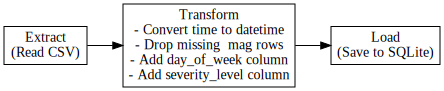

In [ ]:
from graphviz import Digraph
from IPython.display import display

# Create directed graph
dot = Digraph('ETL', format='png')
dot.attr(rankdir='LR')  # Left to right layout

# --- Nodes ---
dot.node('E', 'Extract\n(Read CSV)', shape='box', color='black')
dot.node('T', '''Transform
- Convert time to datetime
- Drop missing  mag rows
- Add day_of_week column
- Add severity_level column''', shape='box', color='black')
dot.node('L', 'Load\n(Save to SQLite)', shape='box', color='black')

# --- Edges ---
dot.edge('E', 'T')
dot.edge('T', 'L')

# Display directly in notebook/Colab
display(dot)


extracted earthquake data from a CSV file into Pandas for processing. During transformation, cleaned missing values of magnitudes, converted time to datetime, filtered earthquakes with magnitude ≥ 4.0, engineered new features like day_of_week and severity_level, and aggregated statistics per place and per day. Finally, loaded both the cleaned dataset and summary tables into a SQLite database for storage and analysis.

One insight your team discovered from the data

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.isna().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,1139
gap,1139
dmin,1140
rms,0


In [ ]:
summary = df.groupby('type').agg(
    avg_magnitude=('mag', 'mean'),
    max_magnitude=('mag', 'max'),
    avg_depth=('depth', 'mean'),
    max_depth=('depth', 'max'),
    count=('type', 'count')
).reset_index()

print("Summary by Type:\n", summary)

Summary by Type:
            type  avg_magnitude  max_magnitude  avg_depth  max_depth  count
0    earthquake       1.437823           7.80  17.027621    639.511   9737
1     explosion       1.435410           2.24  -0.166557     16.000     61
2     landslide       1.400000           1.40   0.000000      0.000      1
3  quarry blast       1.352960           2.10  -0.506480      5.590    125


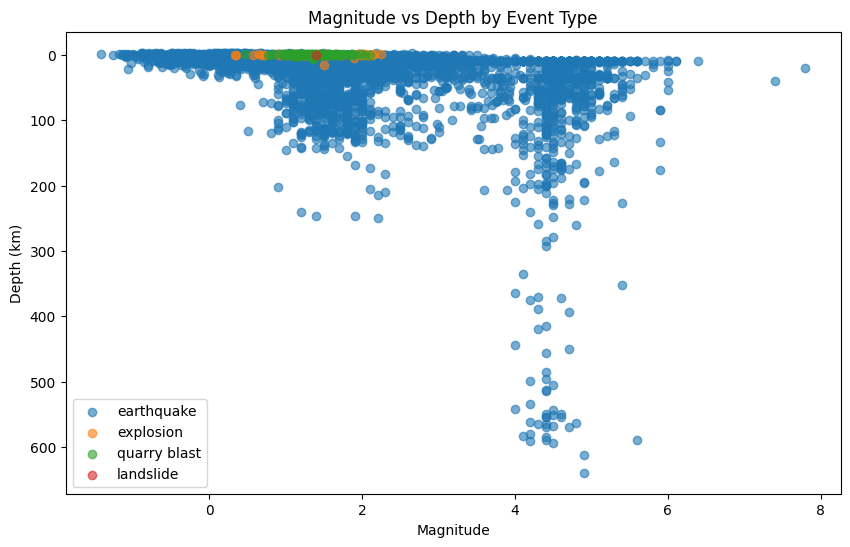

In [ ]:
plt.figure(figsize=(10,6))
for t in df['type'].unique():
    subset = df[df['type'] == t]
    plt.scatter(subset['mag'], subset['depth'], label=t, alpha=0.6)

plt.gca().invert_yaxis()  # Depth increases downwards in real life
plt.xlabel("Magnitude")
plt.ylabel("Depth (km)")
plt.title("Magnitude vs Depth by Event Type")
plt.legend()
plt.show()

Earthquakes occur across a wide range of depths (up to 640 km) and magnitudes (up to 7.8), while quarry blasts and explosions are consistently shallow (near 0 km) and weak (<2.5 magnitude).

In [26]:
# Count number of earthquakes per place
place_counts = df.groupby('place').size().reset_index(name='earthquake_count')

# Average magnitude per place
place_magnitude = df.groupby('place')['mag'].mean().reset_index(name='avg_magnitude')

# Merge both summaries
place_summary = pd.merge(place_counts, place_magnitude, on='place')

# Sort by earthquake count (Top 10 places)
top_places = place_summary.sort_values(by='earthquake_count', ascending=False).head(10)

print("Top 10 Places by Earthquake Frequency with Average Magnitude:\n")
print(top_places)


Top 10 Places by Earthquake Frequency with Average Magnitude:

                                        place  earthquake_count  avg_magnitude
1057                15 km NE of Milford, Utah               203       1.023596
2338  27 km W of Hebgen Lake Estates, Montana                80       0.546875
4412              7 km NNW of The Geysers, CA                58       0.931034
4500                     7 km WNW of Cobb, CA                57       0.859825
4732              8 km NNW of The Geysers, CA                51       0.938627
4092                     6 km WNW of Cobb, CA                51       0.694510
3429              47 km ESE of Beatty, Nevada                48      -0.033333
3874       56 km S of Whites City, New Mexico                47       1.468085
2988          38 km WSW of False Pass, Alaska                46       0.373696
1873             21 km ESE of Little Lake, CA                46       0.793043
